In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mnd
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import bernoulli as ber
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [2]:
uspsdata=pd.read_csv("usps_digit_recognizer.csv")

In [4]:
#uspsdata.head(1)

In [382]:
# changing the columns  to put data in X,y format 
labl = uspsdata.pop('label')    # save the first column in "labl" 
uspsdata['label'] = labl        # adds a column label to the dataframe with the values saved in "labl"

In [383]:
#uspsdata.head(1)

In [384]:
#dataframe into numpy array
data=uspsdata.to_numpy()

In [385]:
#data.shape

In [386]:
X = data[:,:-1]
y = data[:,-1]

In [431]:
X.shape
#y.shape

(42000, 784)

In [388]:
#check the distribution of digit label data
dist = uspsdata['label'].value_counts().sort_index()
dist

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

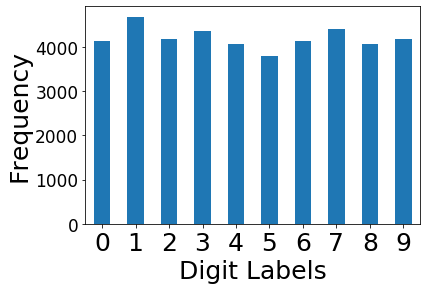

In [389]:
#plot the distribution of digit label data
dist.plot(kind='bar')
plt.tick_params(axis='y', labelsize=17)
plt.tick_params(axis='x',rotation=0, labelsize=25)
plt.xlabel("Digit Labels", size=25)
plt.ylabel("Frequency", size=25)

plt.show()


In [390]:
#normalizing X
X = X/255

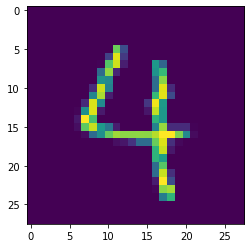

In [391]:
#reshape the flat pixels into a matrix of size 28x28 to show it
digit = X[999]
digit_reshaped = digit.reshape([28, 28]) #since it is a 28x28 size pic we resize it accordingly
plt.imshow(digit_reshaped)


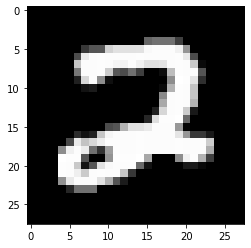

In [445]:
digit = X[169]

digit_reshaped = digit.reshape([28, 28]) #since it is a 28x28 size pic we resize it accordingly
plt.imshow(digit_reshaped, cmap='gray')
plt.show()

In [392]:
# prepare cross validation
kfold = KFold(5, True, 1)
# enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
for train_index, test_index in kfold.split(y):
    y_train, y_test = y[train_index], y[test_index]
    

In [393]:
#X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape

In [394]:
##########Class def Below#########################

In [395]:
#class defination for Gaussian Bayes Classification:
class GaussianBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            mu_k = X_k.mean(axis=0)
            N_k, D = X_k.shape
            
            self.likelihoods[k] = {"mean": mu_k, "cov":(1/(N_k -1))*np.matmul((X_k).T, X_k - mu_k) + epsilon*np.identity(D) }  #made changes in mean and cov
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [396]:
## initialize the model class
gb = GaussianBayes()

In [397]:
##train the model and predict

gb.fit(X_train, y_train)

y_hat = gb.predict(X_test)
    

In [398]:
#function for accuracy

def accuracy(y, y_hat):
    return np.mean(y==y_hat)


In [399]:
#print the accuracy of the model

print(f"accuracy:{accuracy(y_test, y_hat):0.4f}")

accuracy:0.9050


In [400]:
## Print the classification report

print(classification_report(y_test, y_hat, labels=range(0,10)))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       789
           1       0.97      0.95      0.96       969
           2       0.89      0.91      0.90       810
           3       0.90      0.87      0.89       912
           4       0.95      0.88      0.91       849
           5       0.96      0.81      0.88       750
           6       0.96      0.95      0.96       824
           7       0.96      0.87      0.91       898
           8       0.74      0.93      0.82       780
           9       0.82      0.92      0.87       819

    accuracy                           0.91      8400
   macro avg       0.91      0.90      0.90      8400
weighted avg       0.91      0.91      0.91      8400



In [410]:
print(classification_report(y_test, y_hat, labels=range(0,10)))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       789
           1       0.97      0.95      0.96       969
           2       0.89      0.91      0.90       810
           3       0.90      0.87      0.89       912
           4       0.95      0.88      0.91       849
           5       0.96      0.81      0.88       750
           6       0.96      0.95      0.96       824
           7       0.96      0.87      0.91       898
           8       0.74      0.93      0.82       780
           9       0.82      0.92      0.87       819

    accuracy                           0.91      8400
   macro avg       0.91      0.90      0.90      8400
weighted avg       0.91      0.91      0.91      8400



In [411]:
dataclassificationreport =classification_report(y_test, y_hat, labels=range(0,10))

In [464]:

## print he Confusion matrix 

cm = confusion_matrix(y_test, y_hat)
cm

array([[761,   0,   7,   5,   0,   1,   5,   0,  10,   0],
       [  0, 917,  18,   3,   4,   0,   3,   1,  20,   3],
       [  3,   3, 734,  18,   4,   0,   4,   1,  43,   0],
       [  6,   2,  18, 792,   2,   8,   0,   4,  68,  12],
       [  1,   1,  16,   2, 744,   1,   9,   7,  17,  51],
       [ 13,   1,   7,  33,   5, 606,   7,   0,  65,  13],
       [  8,   1,   1,   0,   1,  12, 786,   0,  15,   0],
       [  3,   2,   9,   2,  10,   0,   0, 783,   7,  82],
       [  4,  13,  10,  17,   2,   1,   4,   0, 723,   6],
       [  4,   1,   4,   4,  13,   0,   0,  23,  14, 756]], dtype=int64)

In [465]:
df_confusion = pd.crosstab(y_test, y_hat)
print (df_confusion)

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      761    0    7    5    0    1    5    0   10    0
1        0  917   18    3    4    0    3    1   20    3
2        3    3  734   18    4    0    4    1   43    0
3        6    2   18  792    2    8    0    4   68   12
4        1    1   16    2  744    1    9    7   17   51
5       13    1    7   33    5  606    7    0   65   13
6        8    1    1    0    1   12  786    0   15    0
7        3    2    9    2   10    0    0  783    7   82
8        4   13   10   17    2    1    4    0  723    6
9        4    1    4    4   13    0    0   23   14  756


In [469]:
b=y_test.shape
b

(8400,)

In [468]:
a=sum(np.diagonal(df_confusion))
a

7602

In [462]:
a/b*100

array([90.5])

In [429]:
#df_confusion.to_html('your_output_file_name.html')


In [430]:
#df_confusion.to_csv('your_output_file_name.csv')


In [200]:
#####################################################################################
#####################################################################################
#####################################################################################

In [29]:
# DataFrame column names as a list
#colnamelist = list(uspsdata.columns)

In [54]:
# brings the first column in the last place
#newcollist= colnamelist[1:] + colnamelist[:1]
#newcollist

In [75]:
#data in the format (X,y) where X are features and y is class 
#digitdata = uspsdata[newcollist]
#digitdata.head(1)

In [72]:
#seperating the data into X and y
#data=digitdata.to_numpy()
